In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# The problem: We want to predict the salary for a worker, based on years of experience(feature).
# salary = minimum wage + increase per year * years of experience + noise(in real world there are external effects we cannot take into account).
# x = years of experience (the feature), b = minimum wage(parameter), w = increase per year
# Model: y = b + wx + epsilon(noise)
# We need to find the optimal b and w parameters.

# Parameters generation as source of truth (the training model we build tries getting closer to these values)
true_b = 1 # thousands of dollars
true_w = 2 # thousand of dollars

# Generation of synthatic dataset (in real world this data is gathered from users etc..)
N = 100 # 100 points of syntathic data for feature x
np.random.seed(42)
x = np.random.rand(N, 1) # random 100 points between 0 and 1 (years of worker experience)

# Data preperation and splitting
epsilon = (.1 * np.random.randn(N, 1)) # random noise for each point of data
y = true_b + true_w * x + epsilon # finding the labels (elementwise operations on vectors)
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses the first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

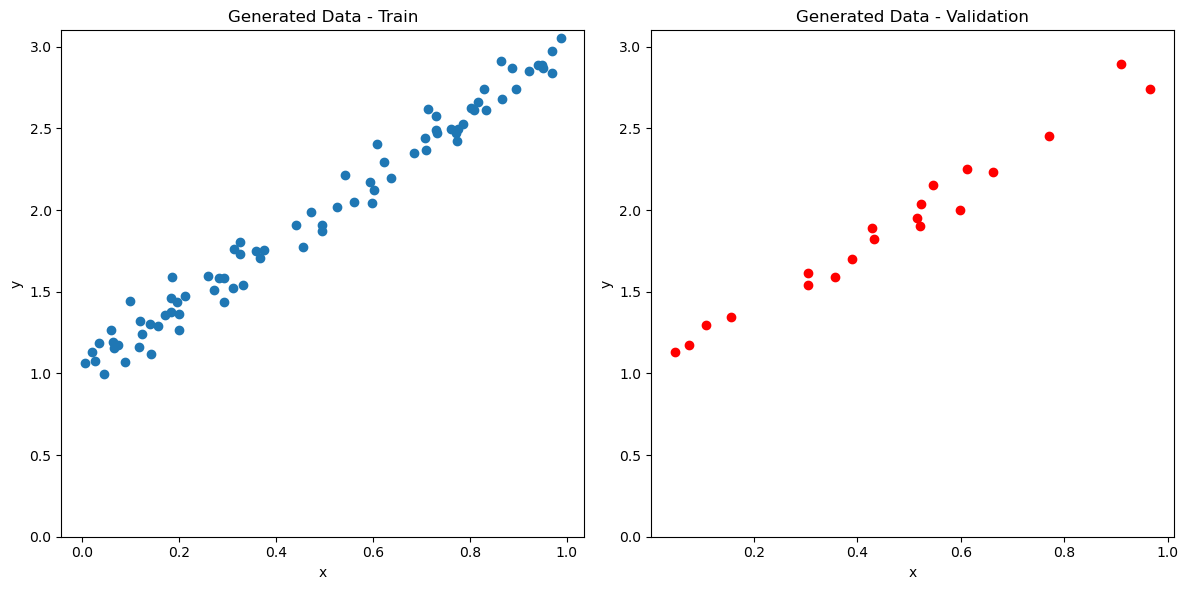

In [56]:
# Visualize data points for train and test
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

figure1(x_train, y_train, x_val, y_val)


In [57]:
# The training algorithm
# Step 0 - initialize parameters "b" and "w" randomly (the model will try to guess better ones gradually in each iteration)
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

[0.49671415] [-0.1382643]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

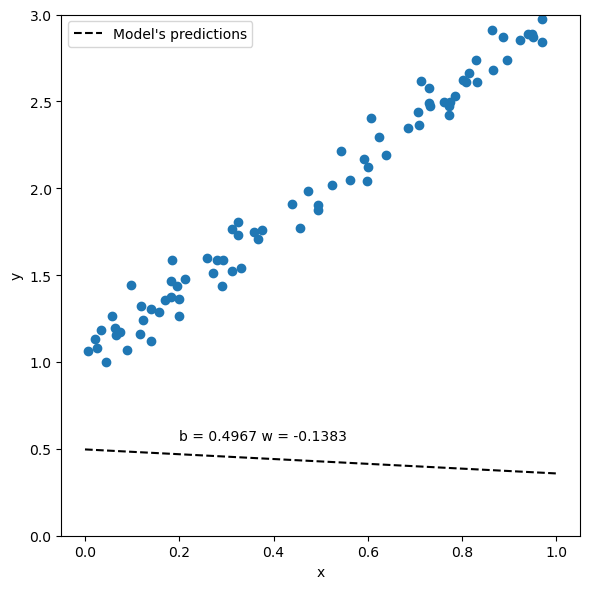

In [58]:
# Step 1 - computes model predictions based on current values (called forward pass)
yhat = b+w*x_train

# Visualize the model predictions
def figure2(x_train, y_train, b, w, color='k'):
    # Generates evenly spaced x feature
    x_range = np.linspace(0, 1, 101)
    # Computes yhat
    yhat_range = b + w * x_range

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([0, 3])

    # Dataset
    ax.scatter(x_train, y_train)
    # Predictions
    ax.plot(x_range, yhat_range, label='Model\'s predictions', c=color, linestyle='--')

    # Annotations
    ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.2, .55), c=color)
    ax.legend(loc=0)
    fig.tight_layout()
    return fig, ax

figure2(x_train, y_train, b, w)

In [59]:
# Step 2 - Loss by MSE formula - mean squared error
# We use all the data points of the training set - it is called a batch gradient descent
error = (yhat - y_train)
loss = (error**2).mean() # the smaller the better (closer to the "true")
print(loss)

2.7421577700550976


In [60]:
# Step 3 - Computes gradients for both b and w
b_grad = 2*error.mean()
w_grad = 2*(x_train*error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

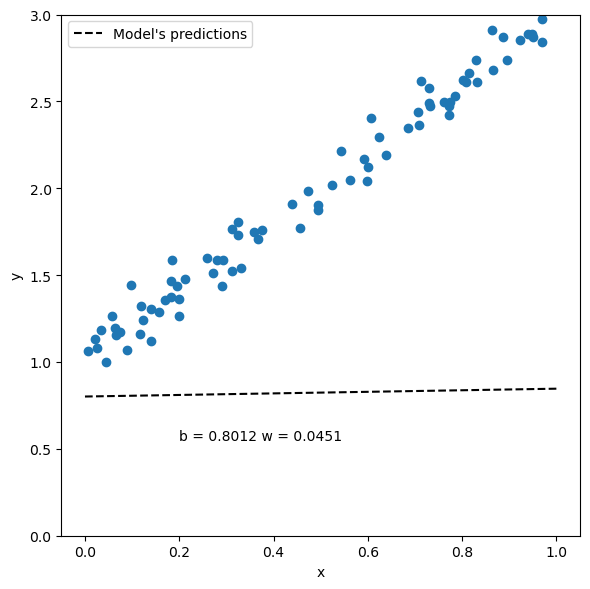

In [61]:
# Step 4 - Updating the parameters
lr = 0.1 # learning rate
print(b,w)

b = b - lr *b_grad
w = w - lr * w_grad
print(b,w)

# Visualize the progress..
figure2(x_train, y_train, b, w)

In [62]:
# Normalization - we can do it now for the next iteration of gradient descent. The original labels are untouched.
scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaled_x_train = scaler.fit(x_train)
scaled_x_val = scaler.fit(x_val)

# Step 5 - Rinse and Repeat (going to step 1 with the updated paramters (b,w))

